<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Leitura-dos-Dados" data-toc-modified-id="Leitura-dos-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Leitura dos Dados</a></span></li><li><span><a href="#EDA:-Explorando-Insights" data-toc-modified-id="EDA:-Explorando-Insights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA: Explorando Insights</a></span><ul class="toc-item"><li><span><a href="#Overview-Geral-da-Base" data-toc-modified-id="Overview-Geral-da-Base-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overview Geral da Base</a></span></li><li><span><a href="#Variáveis-de-Espaço-e-Ambiente" data-toc-modified-id="Variáveis-de-Espaço-e-Ambiente-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variáveis de Espaço e Ambiente</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento referente a análise exploratória de insights relacionada ao dataset [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) retirado da plataforma Kaggle para aprimoramento de skills em Data Science e Machine Learning.

___
**_Descrição e contexto:_**
_Peça a um comprador de casas para descrever a casa dos seus sonhos e ele provavelmente não irá iniciar a descrição com a "altura do teto do porão" ou com a "proximidade com uma ferrovia leste-oeste". Entretanto, o conjunto de dados dessa competição prova que existem influencias na negociação de casas além do número de quartos ou banheiros. Com aproximadamente 80 variáveis explicativas descrevento praticamente todo e qualquer aspecto residencial de casas em Ames, Iowa, essa competição desafia o usuário a prever o preço final de casas._

Paralelamente, este notebook será essencial para a validação de novos desenvolvimentos atrelados ao pacote [pycomp](https://github.com/ThiagoPanini/pycomp), uma biblioteca caseira desenvolvida com o intuito de facilitar todos os passos relacionados a análise de dados, desde a exploração inicial envolvendo plotagens gráficas até o treinamento e aprimoramento de modelos preditivos.

!pip install pycomp --upgrade --no-cache-dir

In [1]:
# Bibliotecas do projeto
import pandas as pd
import os
from datetime import datetime
from warnings import filterwarnings
filterwarnings('ignore')

# Variáveis do projeto
DATA_PATH = 'data/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# Leitura dos Dados

Após a importação das principais bibliotecas comuns ao projeto e também da definição de variávies importantes para a leitura dos dados, é possível realizar o primeiro contato com a base de dados disponível para o desenvolvimento da tarefa.

In [2]:
# Lendo dados de treino
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Com a leitura dos dados, é possível consultar a página de [metadados](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) para extrair o significado de cada uma das 80 colunas disponíveis na base:

* **_1stFlrSF_**:	Área total do primeiro andar da moradia
* **_2ndFlrSF_**:	Área total do segundo andar da moradia
* **_3SsnPorch_**:	Área de varande de três temporadas (?)
* **_Alley_**:	Característica da viela que dá acesso a moradia
* **_BedroomAbvGr_**:	Quantidade de camas na moradia (acima do porão)
* **_BldgType_**:	Tipo de habitação
* **_BsmtCond_**:	Classifica condição geral do porão
* **_BsmtExposure_**:	Exposição do porão da moradia
* **_BsmtFinSF1_**:	Área coberta pelo acabamento do tipo 1 (atributo BsmtFinType1)
* **_BsmtFinSF2_**:	Área coberta pelo acabamento do tipo 2 (atributo BsmtFinType2)
* **_BsmtFinType1_**:	Score do acabamento da região relacionada ao porão
* **_BsmtFinType2_**:	Score do acabamento da região relacionada ao porão (se mais de um existir)
* **_BsmtFullBath_**:	Banheiros completos (full) da área relacionada ao porão
* **_BsmtHalfBath_**:	Banheiros incompletos (half) da área relacionada ao porão
* **_BsmtQual_**:	Classifica a moradia quanto ao tamanho do porão
* **_BsmtUnfSF_**:	Área do porão sem acabamento
* **_CentralAir_**:	Define se existe ou não um ar condicionado central (atributo booleano)
* **_Condition1_**:	Proximidade com pontos importantes da cidade
* **_Condition2_**:	Proximidade com pontos importantes da cidade (se houver mais de um)
* **_Electrical_**:	Tipo de sistema elétrico da casa
* **_EnclosedPorch_**:	Área de varanda fechada na moradia
* **_ExterCond_**:	Condição do material externo na data de observação
* **_Exterior1st_**:	Cobertura externa da casa
* **_Exterior2nd_**:	Cobertura externa da casa (se houver mais de uma cobertura)
* **_ExterQual_**:	Qualidade do material utilizado no exterior
* **_Fence_**:	Qualidade do cercado presente na moradia
* **_FireplaceQu_**:	Qualidade das lareiras
* **_Fireplaces_**:	Quantidade de lareiras da moradia
* **_Foundation_**:	Tipo de alicerce utilizado na construção
* **_FullBath_**:	Quantidade de banheiros completos na casa (acima do porão)
* **_Functional_**:	Descreve funcionalidades da casa sob garantia
* **_GarageArea_**:	Área da garagem em metros quadrados
* **_GarageCars_**:	Tamanho da garagem relacionado a quantidade de carros possíveis
* **_GarageCond_**:	Score que define as condições da garagem
* **_GarageFinish_**:	Acabamento interno da garagem
* **_GarageQual_**:	Qualidade da garagem
* **_GarageType_**:	Tipo de garagem da moradia
* **_GarageYrBlt_**:	Ano de construção da garagem
* **_GrLivArea_**:	Área total da sala de estar
* **_HalfBath_**:	Quantidade de banheiros incompletos (half) na casa (acima do porão)
* **_Heating_**:	Tipo de aquecimento da moradia
* **_HeatingQC_**:	Qualidade do aquecimento
* **_HouseStyle_**:	Estilo da habitação
* **_KitchenAbvGr_**:	Quantidade de cozinhas na moradia (acima do porão)
* **_KitchenQual_**:	Qualidade das cozinhas
* **_LandContour_**:	Nivelamento da moradia
* **_LandSlope_**:	Declive da propriedade
* **_LotArea_**:	Área do loteamento
* **_LotConfig_**:	Configuração do loteamento
* **_LotFrontage_**:	Dimensão do perímetro frontal da casa
* **_LotShape_**:	Formato geral da moradia
* **_LowQualFinSF_**:	Área total de acabamentos de baixa qualidade em toda a moradia
* **_MasVnrArea_**:	Área coberta pela alvenaria
* **_MasVnrType_**:	Tipo de alvenaria utilizada
* **_MiscFeature_**:	Algumas features não inclusas nas demais categorias
* **_MiscVal_**:	Valor das features não inclusas em critérios de quantidades
* **_MoSold_**:	Mês no qual a venda da moradia foi efetivada
* **_MSSubClass_**:	Identifica o tipo de moradia da residência
* **_MSZoning_**:	Classifica o imóvel por zona
* **_Neighborhood_**:	Localidade relacionada as fronteiras da cidade
* **_nome_variavel_**:	descricao
* **_OpenPorchSF_**:	Área de varanda aberta na moradia
* **_OverallCond_**:	Score da condição geral da moradia
* **_OverallQual_**:	Score do material e acabamento da moradia
* **_PavedDrive_**:	Atributo que define a pavimentação da rua (dentro da moradia)
* **_PoolArea_**:	Área de piscina presente na moradia
* **_PoolQC_**:	Qualidade da piscina
* **_RoodMatl_**:	Material utilizado na cobertura (telhado)
* **_RoofStyle_**:	Tipo de cobertura da casa (telhado)
* **_SaleCondition_**:	Condições da venda
* **_SaleType_**:	Tipo da venda
* **_ScreenPorch_**:	Área de tela na varanda da moradia
* **_Street_**:	Característica da rua que dá acesso a moradia
* **_TotalBsmtSF_**:	Área total do porão
* **_TotRmsAbvGrd_**:	Quantidade total de quartos na moradia (acima do porão)
* **_Utilities_**:	Serviços de utilidade pública
* **_WoodDeckSF_**:	Área do deck de madeira presente na moradia
* **_YearBuilt_**:	Ano de construção da casa
* **_YearRemodAdd_**:	Ano de remodelação da casa (mesmo que YearBuilt se a casa não foi remodelada)
* **_YrSold_**:	Ano no qual a venda da moradia foi efetivada

# EDA: Explorando Insights

Neste ponto, tem-se um contexto bem definido do objetivo do projeto, além de uma base de dados já lida e transformada em um formato DataFrame do pandas. A partir deste momento, será proposta uma verdadeira varredura nos dados para a aplicação de uma análise descritiva detalhada em prol do levantamento de insights relevantes para o contexto de negócio.

Utilizando o pacote caseiro [pycomp](https://github.com/ThiagoPanini/pycomp), cuja construção foi motivada exatamente para facilitar o trabalho de cientistas de dados nos pilares de insights, prep e modelagem, espera-se, dessa segunda sessão, um entendimento pleno sobre o conjunto de dados disponíveis e uma ideia clara sobre os passos necessários para serem aplicados no prep e na modelagem.

<img src="https://i.imgur.com/WcAaq1P.png" alt="pycomp Logo"></a>

## Overview Geral da Base

Este projeto possui uma particularidade: a presença de um número elevado de variáveis disponíveis para análise. Dessa forma, para que o projeto não fique extremamente extenso a partir da análise individual de cada uma das variáveis, é importante fornecer uma visão geral dos atributos presentes no conjunto de dados com alguns pontos relevantes que podem auxiliar futuras decisões de análise.

Para isso, será utilizada a função `data_overview()` que, por sua vez, executa uma série de análises úteis na base como um todo, retornando, por fim, características relevantes para cada um dos atributos presentes.

In [3]:
# Importando funções e definindo target
from pycomp.viz.insights import *

TARGET = 'SalePrice'

df_overview = data_overview(df=df, corr=True, target=TARGET)
print(f'Visualizando algumas variáveis e seus respectivos dados')
df_overview.head(25)

Visualizando algumas variáveis e seus respectivos dados


,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
0,PoolQC,1453,0.995205,object,3,NaN
1,MiscFeature,1406,0.963014,object,4,NaN
2,Alley,1369,0.937671,object,2,NaN
3,Fence,1179,0.807534,object,4,NaN
4,FireplaceQu,690,0.472603,object,5,NaN
5,LotFrontage,259,0.177397,float64,0,0.351799
6,GarageYrBlt,81,0.055479,float64,0,0.486362
7,GarageCond,81,0.055479,object,5,NaN
8,GarageType,81,0.055479,object,6,NaN
9,GarageFinish,81,0.055479,object,3,NaN


Ao executar a função `data_overview()`, é possível retornar, para cada um dos atributos, as seguintes informações:

* **_qtd_null_**: quantidade de dados nulos presentes na respectiva coluna;
* **_pct_null_**: percentual de dados nulos da respectiva coluna;
* **_dtype_**: tipo primitivo relacionado a coluna;
* **_qtd_cat_**: quantidade de categorias distintas (no caso de variáveis categóricas);
* **_target_pearson_corr_**: correlação com a variável target.

Dessa forma, é possível perceber algumas particularidades interessantes:

* A variável `PoolQC` possui 99.5% de entradas nulas na base. Na prática, essa variável indica a qualidade da piscina presente no imóvel e, dados nulos provavalmente indicam que o imóvel não possui piscina;
* As variáveis `MiscFeature`, `Alley` e `Fence` também possuem uma alta quantidade de dados nulos. Na prática, assim como em `PoolQC`, essas variáveis descrevem características específicas e particulares dos imóveis, o que, de fato, pode não estar presente na grande maioria das casas;
* Observando a lista ordenada por quantidade de dados nulos, é possível notar que as variáveis `GarageYrBlt`, `MasVnrArea` e `Fireplaces` possuem altas correlações com a variável target (`SalePrice`) e este pode ser um bom fator investigativo no futuro

In [4]:
# Principais variáveis por quantidade de entradas categóricas
df_overview.sort_values(by='qtd_cat', ascending=False).head()

,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
53,Neighborhood,0,0.0,object,25,NaN
77,Exterior2nd,0,0.0,object,16,NaN
78,Exterior1st,0,0.0,object,15,NaN
52,Condition1,0,0.0,object,9,NaN
42,SaleType,0,0.0,object,9,NaN


In [5]:
# Principais variáveis por correlação positiva
df_overview.sort_values(by='target_pearson_corr', ascending=False).head()

,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
80,SalePrice,0,0.0,int64,0,1.000000
48,OverallQual,0,0.0,int64,0,0.790982
30,GrLivArea,0,0.0,int64,0,0.708624
29,GarageCars,0,0.0,int64,0,0.640409
31,GarageArea,0,0.0,int64,0,0.623431


Os dois conjuntos acima mostram as principais variáveis por:
1. Quantidade de entradas categóricas
2. Maior correlação positiva com a variável target

Estes dois cenários permitem analisar com maior profundido os possíveis passos a serem consideradas na etapa de Prep da base de dados. Por exemplo, é preciso considerar que a variável `Neighborhood`, ao receber o procedimento de `encoding`, irá gerar 26 colunas adicionais na base final.

## Variáveis de Espaço e Ambiente

Após uma análise inicial nas variáveis presentes na base como um todo, é importante definir os próximos passos de exploração dos dados frente a grande quantidade de features presentes. Dessa forma, a estratégia adotada é a categorização das colunas da base em três diferentes contextos:

* **_Variáveis de Espaço e Ambiente_**: análises relacionadas a variáveis que descrevem situações do imóvel em termos de espaço e ambiente;
* **_Variáveis de Construção_**: insights retirados de variáveis que indicam características de construção do imóvel;
* **_Variáveis de Localização_**: análises gráficas em variáveis que trazem informações relacionadas a localização do imóvel.

Nesta sessão, serão analisadas as variáveis relacionadas a "Espaço e Ambiente", criando conjuntos específicos de features e realizando plotagens gráficas de modo a verificar características estatísticas das features e suas respectivas relações com a variável target.

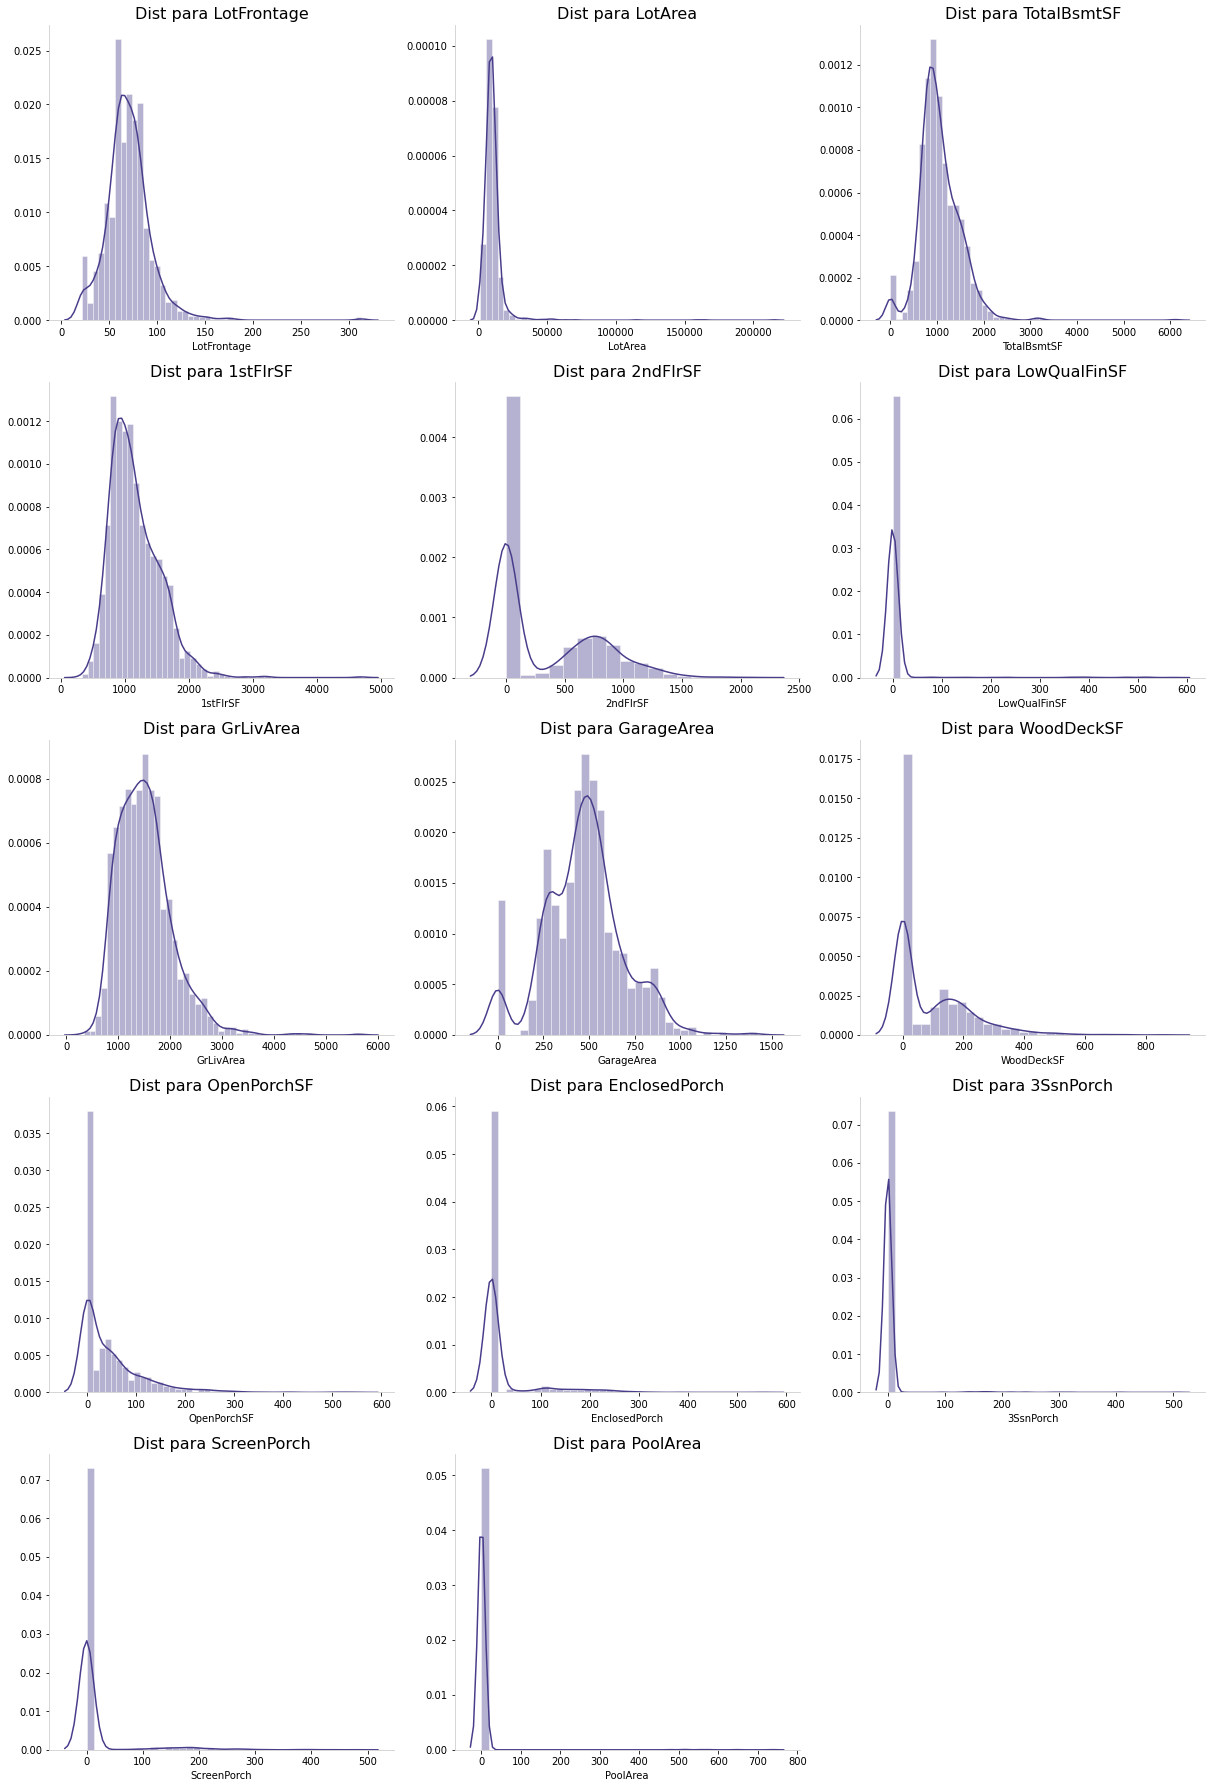

In [6]:
# Separando variáveis de espaço
space_cols = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 
              'BsmtQual', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 
              'GarageType', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 
              'LowQualFinSF', 'MoSold', 'OpenPorchSF', 'PoolArea', 'SaleCondition', 'SaleType',
              'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YrSold']

# Variáveis numéricas de espaço com significado contínuo
num_space_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea']

# Variáveis numéricas de espaço com significado discreto
cat_space_cols = ['BsmtQual', 'GarageType', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                  'GarageCars', 'MoSold', 'YrSold']

# Plotando distribuição das variáveis contínuas de espaço e ambiente
plot_multiple_distplots(df=df, col_list=num_space_cols, kind='dist')

A figura de plotagem acima, gerada pela função `plot_multiple_distplot()` do módulo `pycomp.viz.insights`, consolida gráficos de distribuição para um set específico de variáveis contínuas dentro do contexto de "Espaço e Ambiente" dos imóveis. Nela, é possível visualizar como algumas features se comportam dentro do dataset proposto e, entre as conclusões possíveis, é possível pontuar:

* As variáveis `LotFrontage`, `TotalBsmtSF`, `1stFlrSF` e `GrLivArea` possuem distribuições que se assemelham a distribuição normal gaussiana, permitindo assim a retirada de conclusões visuais claras de parâmetros estatísticos específicos (como a média, desvio padrão, entre outros);
* Algumas outras variáveis, como por exemplo, `LowQualFnSF`, `EnclosedPorch`, `ScreenPorch` e `PoolArea` possuem distribuições semelhantes a variáveis discretas, contendo altos picos em valores 0 (ou próximo a 0).

Para complementar essa análise e adicionar uma visualização que permita analisar a relação de algumas variáveis com a variável target (`SalePrice`), é possível executar a função `plot_multiple_dist_scatterplot()`.

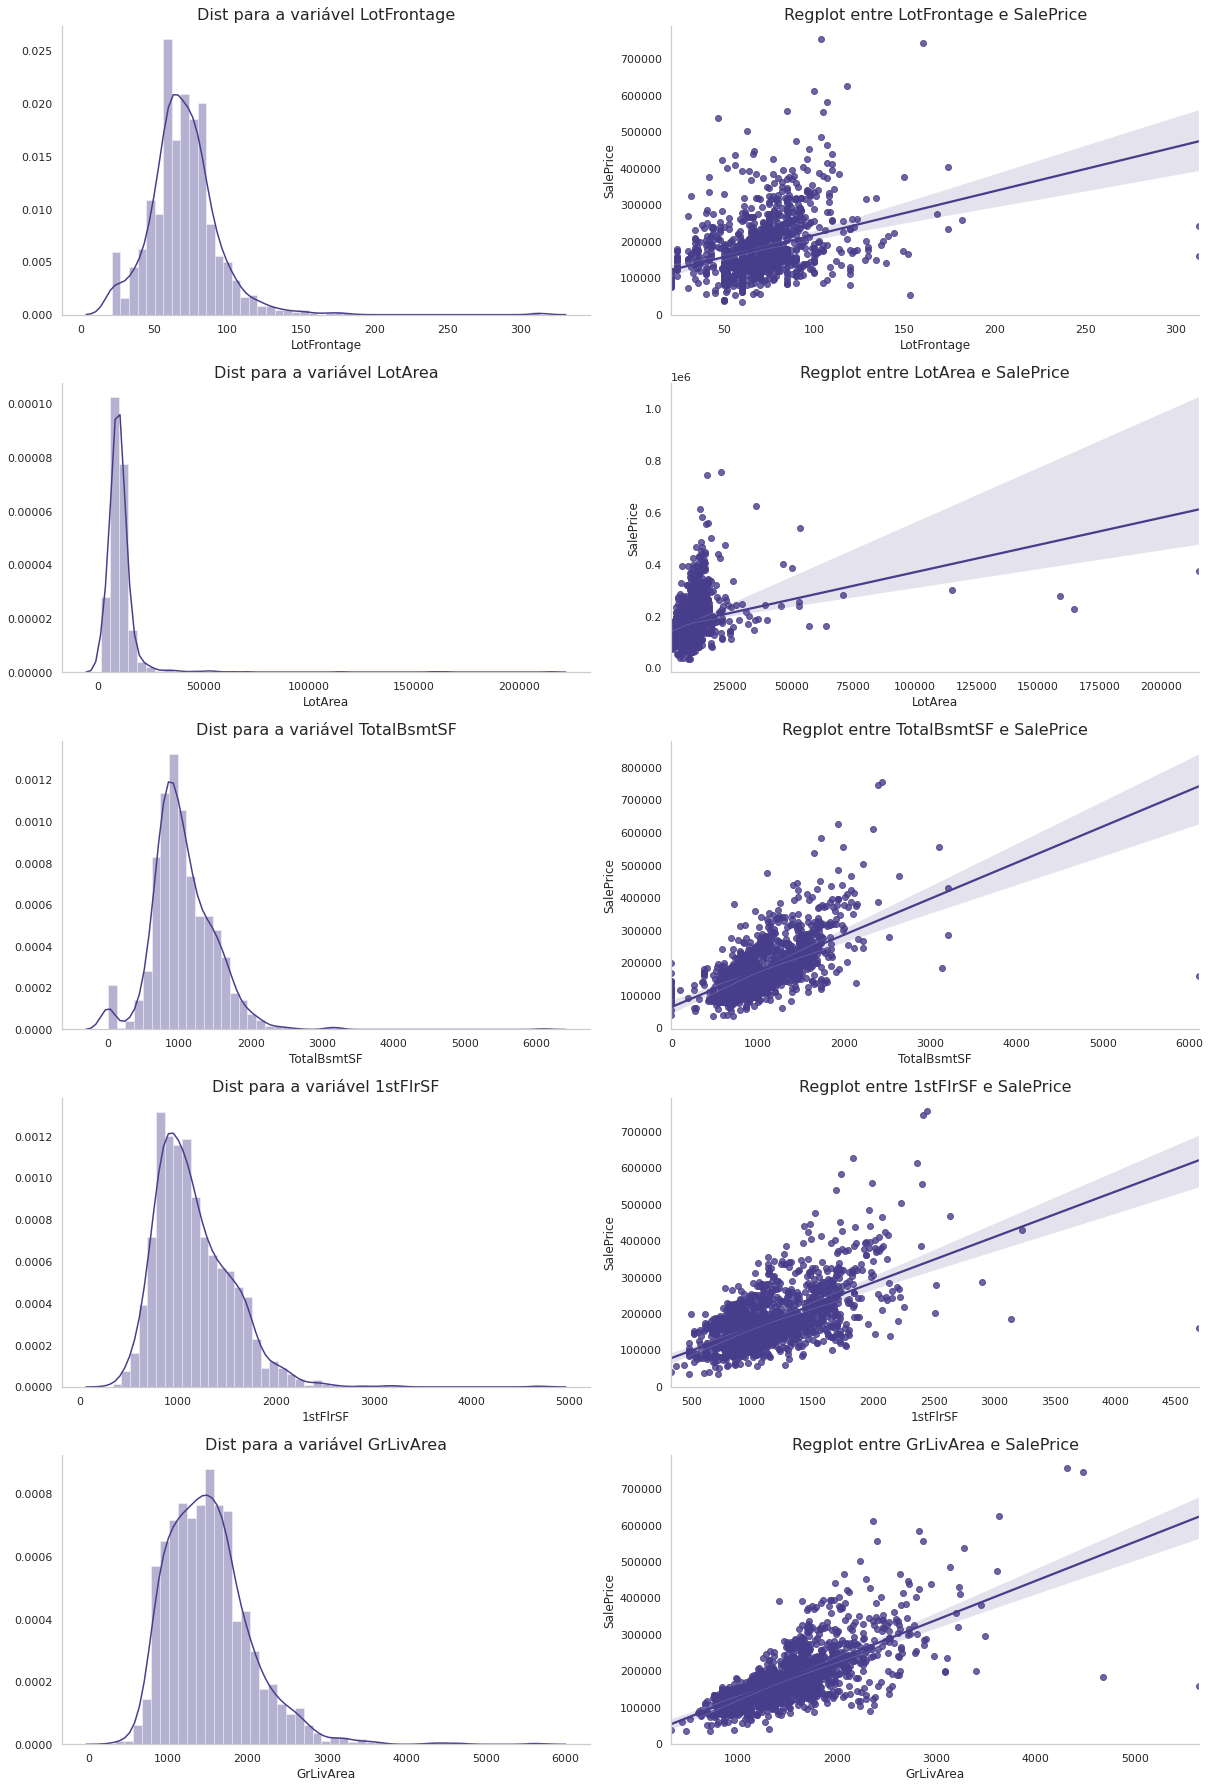

In [7]:
normal_dist_num_space_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
plot_multiple_dist_scatterplot(df=df, col_list=normal_dist_num_space_cols, y_col='SalePrice')

Através da análise da plotagem acima, é possível perceber algumas correlações interessantes entre as variáveis selecionadas e o respectivo preço do imóvel registrado. Em todos os casos observados, existe uma correlação positiva, indicando que a variável target e cada uma das variáveis acima selecionadas possuem uma relação diretamente proporcional. Na prática, essas variáveis indicam informações relacionadas a **área** de ambientes (lote, porão, terreno, garagem, entre outras), permitindo assim uma conclusão direta e genérica: "quanto maior o ambiente, mais caro o imóvel".

Essa visualização é de extrema importância pois, dado o comportamento acima observado, é possível afirmar que essas variáveis podem ter uma boa influência durante a fase de treinamento de um modelo preditivo. Uma outra forma de visualizar essa relação é a partir de uma matriz de correlação, ao qual será analisada futuramente, após a etapa de preparação dos dados.

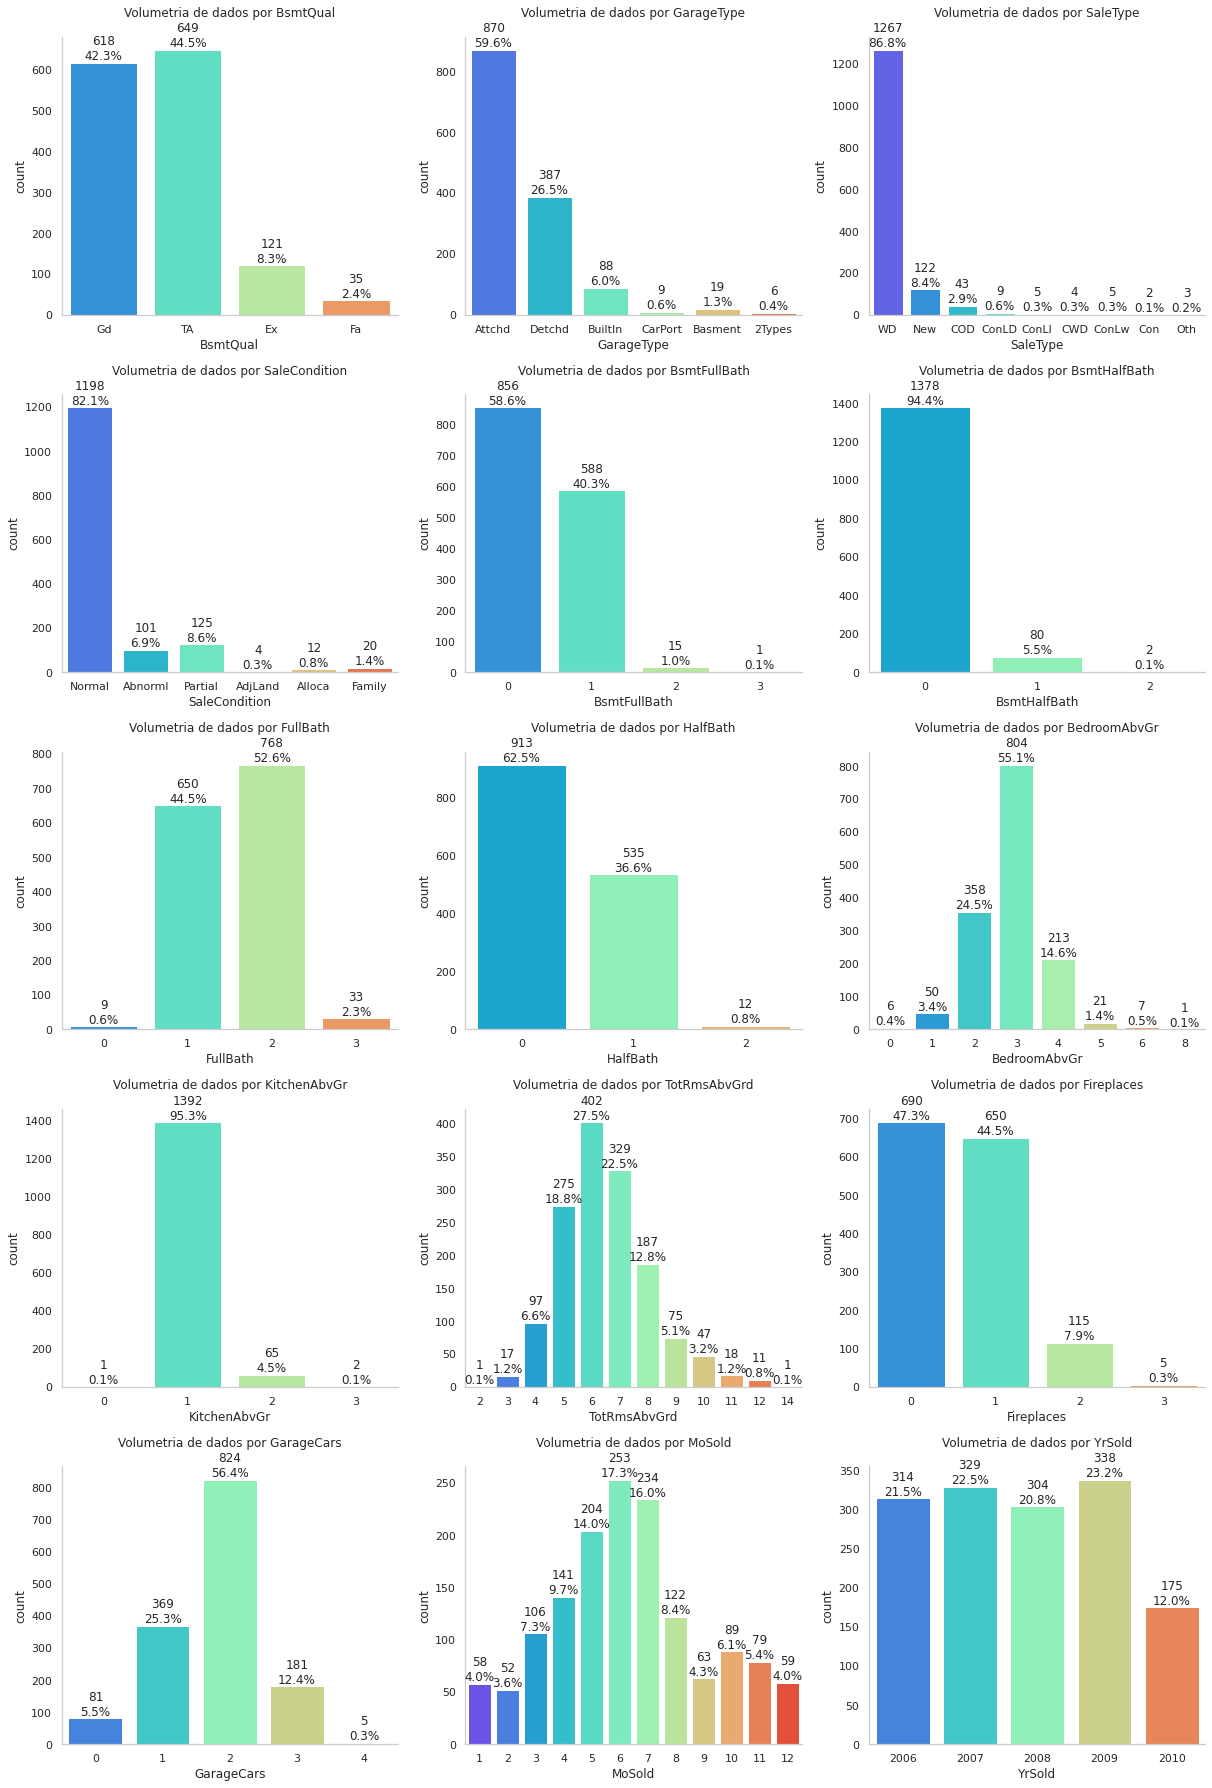

In [8]:
plot_multiple_countplots(df=df, col_list=cat_space_cols, orient='v')

A figura de plotagem acima, gerada pela função `plot_multiple_countplots()` do módulo `pycomp.viz.insights`, traz um overview geral das volumetrias atreladas a cada uma das entradas de algumas variáveis de ambiente e espaço classificadas como categóricas. Apesar da grande quantidade de visões atreladas, é possível extrair alguns insights relevantes, como por exemplo:

* Existe uma tendência histórica maior de vendas nos meses 5, 6 e 7 que pode ser visualizada na plotagem de volumetria para a variável `MoSold`;
* A maioria dos imóveis presentes na base possuem garagem para 2 carros, fato que pode ser constatado pela plotagem por `GarageCars`;
* A maioria das casa não possuem lareira, porém uma parcela relevante possui pelo menos 1 lareira (análise por `Fireplaces`.

Semelhante ao realizado acima com a função `plot_multiple_dist_scatterplot()`, a visão abaixo tem por objetivo analisar graficamente os dados de algumas variáveis e relacioná-los a uma variável target, extraindo indicadores estastísticos como média, mediana, desvio padrão, entre outros.

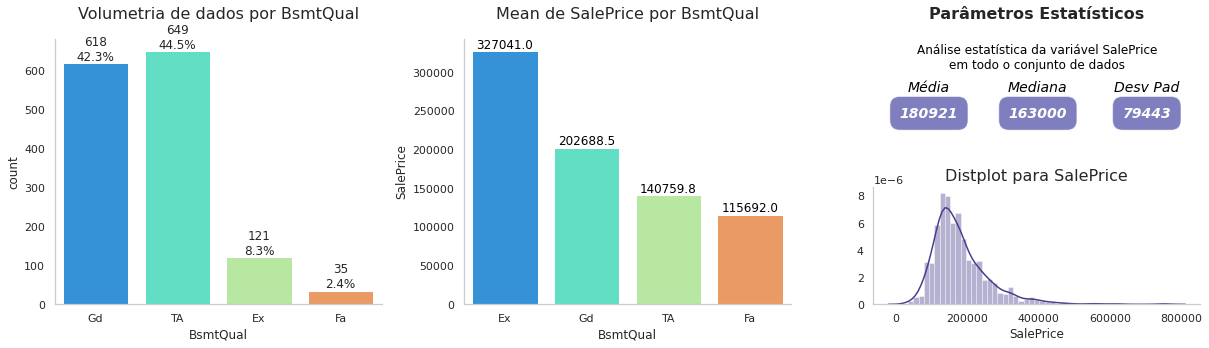

In [9]:
plot_cat_aggreg_report(df=df, cat_col='BsmtQual', value_col=TARGET)

Acima, é possível visualizar o resultado da execução da função `plot_caat_aggreg_report()`, sendo esta construída para proporcionar uma análise completa envolvendo uma coluna _categórica_ e uma coluna _numérica_, analisando as volumetrias envolvidas e os principais parâmetros estatísticos (como média, mediana e desvio padrão).

Dessa forma, é possível visualizar os resultados da variável categórica `BsmtQual` que, por sua vez, traz uma relação discreta da qualidade do porão, com a variável `SalePrice`, representando o preço real do imóvel. Com isso, é possível pontuar:

1. A maioria das casas possuem qualidades `TA` e `Gd` para os porões;
2. Imóveis com porões de qualidade `Ex` possuem a maior média de preços;
3. A média de preço de imóveis com porões `Ex` e `Gd` são maiores que a média geral da base.

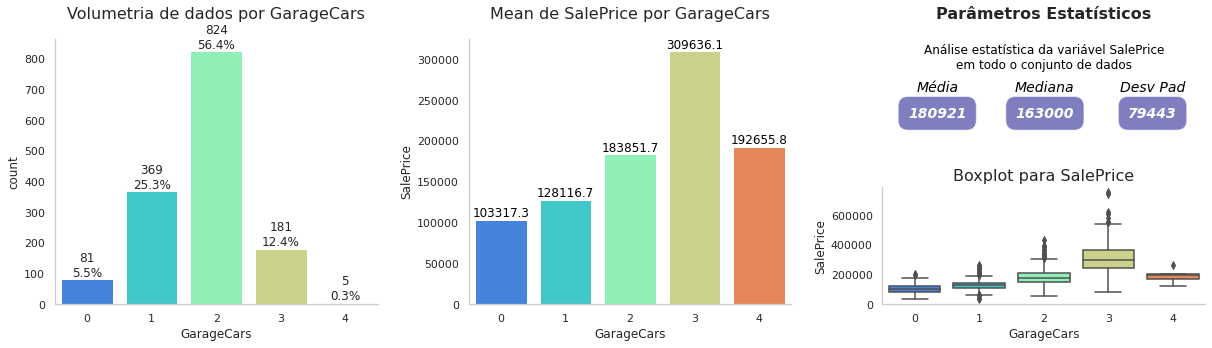

In [10]:
plot_cat_aggreg_report(df=df, cat_col='GarageCars', value_col=TARGET, dist_kind='box')

Acima, podemos visualizar uma relação entre `GarageCars` (espaço para carros na garagem) e `SalePrice`. O report nos mostra que, apesar da maioria dos imóveis possuírem espaço para 2 carros na garagem, a maior média de preços está associada àqueles que possuem espaço para 3 carros.

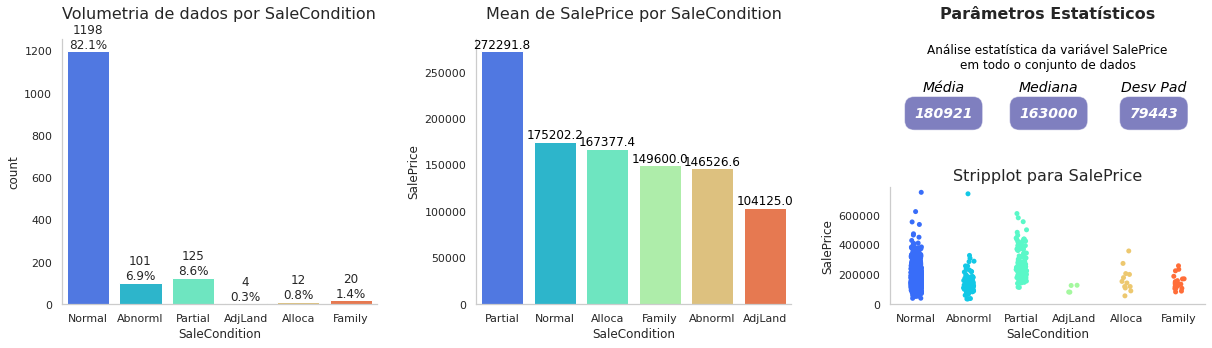

In [11]:
plot_cat_aggreg_report(df=df, cat_col='SaleCondition', value_col=TARGET, dist_kind='strip')

Em uma combinação de análise, é possível verificar o report gerado para as variáveis `SaleCondition` e `SalePrice`. Nele, percebe-se que grande parte das casas foram vendidas sob a condição "Normal", enquanto a maior média de preços de imóveis são oriundos de vendas sob a condição "Partial".

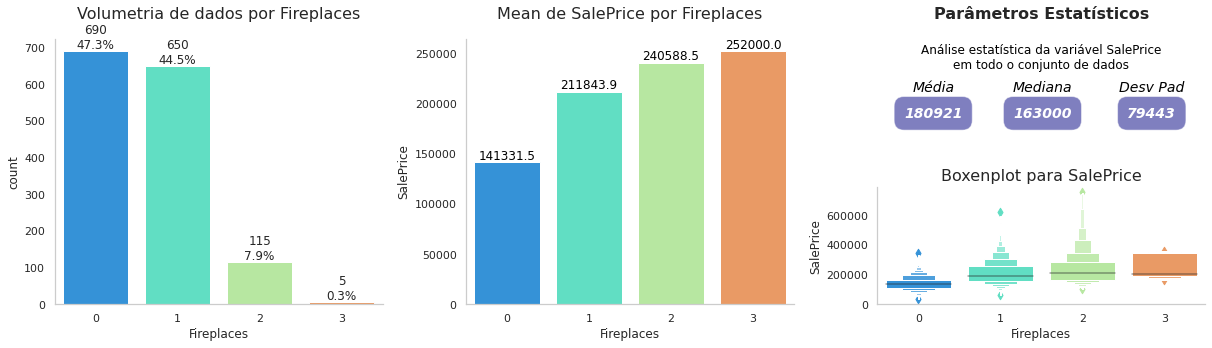

In [12]:
plot_cat_aggreg_report(df=df, cat_col='Fireplaces', value_col=TARGET, dist_kind='boxen')

Por fim, uma outra análise relevante colocada acima é a relação entre `Fireplaces` e o preço de imóveis. Aqui percebe-se uma clara tendência entre o número de lareiras presentes na casa e seu respectivo preço. Apesar de minoria, imóiveis com 5 lareiras possuem a maior média de preços da base.

___

Seria relevante, dentro da proposta de exploração desse conjunto de features, visualizar uma relação de preços de imóveis ao longo do tempo. Na base disponível para análise e, mais especificamente existem duas colunas `MoSold` e `YrSold`. Neste momento, temos a possibilidade de construir uma coluna personalizada concatenando o ano (`YrSold`) e o mês (`MoSold`) de venda do imóvel, gerando assim a possibilidade de analisar a evolução de vendas ao longo do tempo.

In [13]:
def plot_evolutionplot(df, x, y, agg=True, agg_functions=['count', 'sum', 'mean'], 
                          agg_type='count', **kwargs):
    """
    Função responsável por realizar uma plotagem de evolução, em um gráfico de linhas,
    com base principal em análises de data no eixo x. Opcionalmente, é possível configurar
    a função para realizar o procedimento de agregação de forma interna, sendo necessário
    passar apenas a base bruta no argumento "df" e configurar os arugmento "agg",
    "agg_functions" e "agg_type"
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param x: coluna a ser posicionada no eixo x (representação de data) [type: string]
    :param y: coluna a ser analisada no eixo y (agregação) [type: string]
    :param agg: flag para aplicação do agrupamento dentro da função [type: bool, default=True]
    :param agg_functions: lista de agregadores a serem aplicados [type: list, default=['count', 'sum', 'mean']]
    :param agg_type: tipo de agregação a ser analisada no gráfico [type: string, default='count']
    :param **kwargs: parâmetros adicionais da função   
        :arg hue: parâmetro hue para quebra de plotagem [type: string, default=None]
        :arg str_col: flag de coluna de string no eixo x [type: string, default=True] 
        :arg date_col: flag de coluna de data no eixo x [type: string, default=True]
        :arg date_fmt: formato da data a ser aplicado na transformação [type: string, default='%Y%m']
        :arg figsize: dimensões da figura de plotagem [type: tuple, default=(17, 7)]
        :arg ax: eixo do matplotlib em caso de criação externa da figure [type: mpl.Axes, default=None]
        :arg palette: paleta de cores utilizada na plotagem [type: string, default='rainbow_r']
        :arg color: cor a ser utilizada na plotagem [type: string, default='darkslateblue']
        :arg title: título do gráfico [type: string, default=f'Lineplot - {agg_type.title()} de {y_ori} por {x}']
        :arg markers: parâmetro markers da função sns.lineplot() [type: bool, default=False]
        :arg style: parâmetro style da função sns.lineplot() [type: string, default=None]
        :arg size: parâmetro size da função sns.lineplot() [type: string, default=None]
        :arg sort: parâmetro sort da função sns.lineplot() [type: bool, default=False]
        :arg x_rot: rotação do eixo x dos labels [type: int, default=90]
        :arg label_data: flag para inserção de rótulos nas linhas [type: bool, default=True]
        :arg label_aggreg: seleção de agregação do rótulo [type: string, default='K']
            *opções: ['', 'K', 'M', 'B']
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além de uma plotagem de evolução (linhas)

    Aplicação
    ---------
    plot_evolutionplot(df=df, x='date_col', y='num_col', agg_type='sum', date_col=False, x_rot=0)
    """
    
    # Definindo função de agregação
    def make_aggregation(df, group_col, value_col, agg_functions=['count', 'sum', 'mean'], **kwargs):
    
        # Agrupando dados de acordo com a especificação definida
        agg_dict = {value_col: agg_functions}
        df_group = df.groupby(by=group_col, as_index=False).agg(agg_dict)

        return df_group
    
    # Validando presença das colunas x e y na base
    y_ori = y
    if x not in df.columns:
        print(f'Coluna "x"={x} não presente na base')
        return
    if y not in df.columns:
        print(f'Coluna "y"={y} não presente na base')
        return
    
    # Extraindo parâmetros úteis de quebra de plotagem
    hue = kwargs['hue'] if 'hue' in kwargs else None
    if hue:
        df[hue] = df[hue].astype(str)
    
    # Verificando necessidade de agregar dataset
    if agg:
        group_col = [x, hue] if hue else x
        new_columns = [x, hue] + agg_functions if hue else [x] + agg_functions
        df_group = make_aggregation(df=df, group_col=group_col, value_col=y, agg_functions=agg_functions)
        
        # Verificando tipo de agrupamento a ser plotado no gráfico de linhas
        if agg_type not in agg_functions:
            print(f'Argumento "agg_type" não presente na lista "agg_functions"')
            return
        
        # Atualizando coluna y e df da plotagem de acordo com a agregação
        df_group.columns = new_columns
        y = agg_type
    else:
        df_group = df     
        
    # Extraindo parâmetros de transformação das colunas
    str_col = kwargs['str_col'] if 'str_col' in kwargs else True
    date_col = kwargs['date_col'] if 'date_col' in kwargs else True
    date_fmt = kwargs['date_fmt'] if 'date_fmt' in kwargs else '%Y%m'
    
    # Transformando colunas (string e data)
    if str_col:
        df_group[x] = df_group[x].astype(str)
    if date_col:
        try:
            df_group[x] = df_group[x].apply(lambda st: datetime.strptime(str(st), date_fmt))
        except ValueError as ve:
            print(f'{ve}. Modifique o argumento "date_fmt" ou configure "date_col=False"')
            print(f'')
    
    # Extraindo parâmetros adicionais do gráfico
    figsize = kwargs['figsize'] if 'figsize' in kwargs else (17, 7)
    ax = kwargs['ax'] if 'ax' in kwargs else None
    color = kwargs['color'] if 'color' in kwargs else 'darkslateblue'
    palette = kwargs['palette'] if 'palette' in kwargs else 'rainbow_r'
    markers = kwargs['markers'] if 'markers' in kwargs else True
    style = kwargs['style'] if 'style' in kwargs else None
    size = kwargs['size'] if 'size' in kwargs else None
    sort = kwargs['sort'] if 'sort' in kwargs else False
    
    # Plotando gráfico
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(x=x, y=y, data=df_group, ax=ax, hue=hue, color=color, palette=palette, 
                 markers=markers, style=style, size=size, sort=sort)
    
    # Extraindo indicadores de formatação de plotagem
    x_rot = kwargs['x_rot'] if 'x_rot' in kwargs else 90
    title = kwargs['title'] if 'title' in kwargs else f'Lineplot - {agg_type.title()} de {y_ori} por {x}'
    label_data = kwargs['label_data'] if 'label_data' in kwargs else True
    label_aggreg = kwargs['label_aggreg'] if 'label_aggreg' in kwargs else 'K'
    label_aggreg_options = ['', 'K', 'M', 'B']
    if label_aggreg not in label_aggreg_options:
        print(f'Parâmetro "label_aggreg" {label_aggreg} deve estar entre {label_aggreg_options}. Revertendo para "None"')
        label_aggreg = ''   
    label_aggreg_dict = {'': 1, 'K': 1000, 'M': 1000000, 'B': 1000000000}
    label_aggreg_value = label_aggreg_dict[label_aggreg]
    
    # Formatando plotagem
    format_spines(ax, right_border=False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(x_rot)
    ax.set_title(title, size=16)
    
    # Rótulando dados
    if label_data:
        for x, y in zip(df_group[x], df_group[y]):
            ax.annotate(str(round(y/label_aggreg_value, 2))+label_aggreg, xy=(x, y), 
                        textcoords='data', ha='center', va='center', color='dimgrey')
    
    plt.tight_layout()

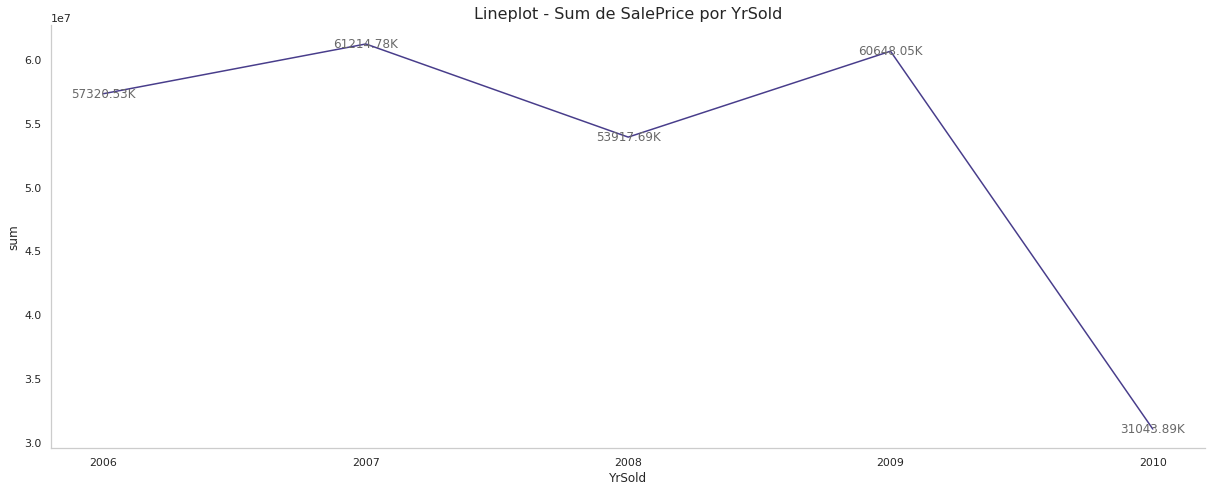

In [14]:
plot_evolutionplot(df=df, x='YrSold', y='SalePrice', agg_type='sum', date_col=False, x_rot=0)

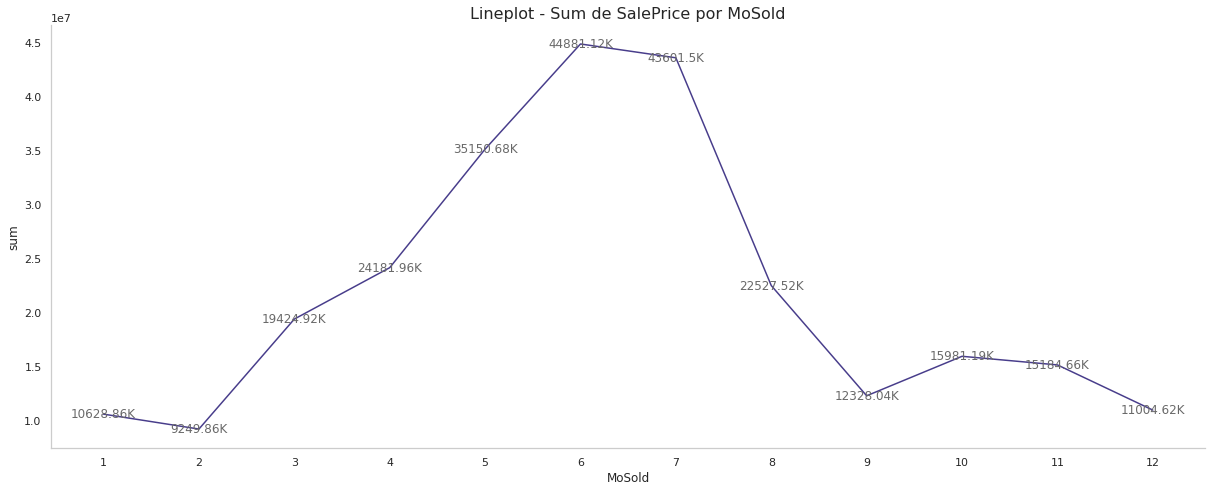

In [15]:
plot_evolutionplot(df=df, x='MoSold', y='SalePrice', agg_type='sum', date_col=False, x_rot=0)

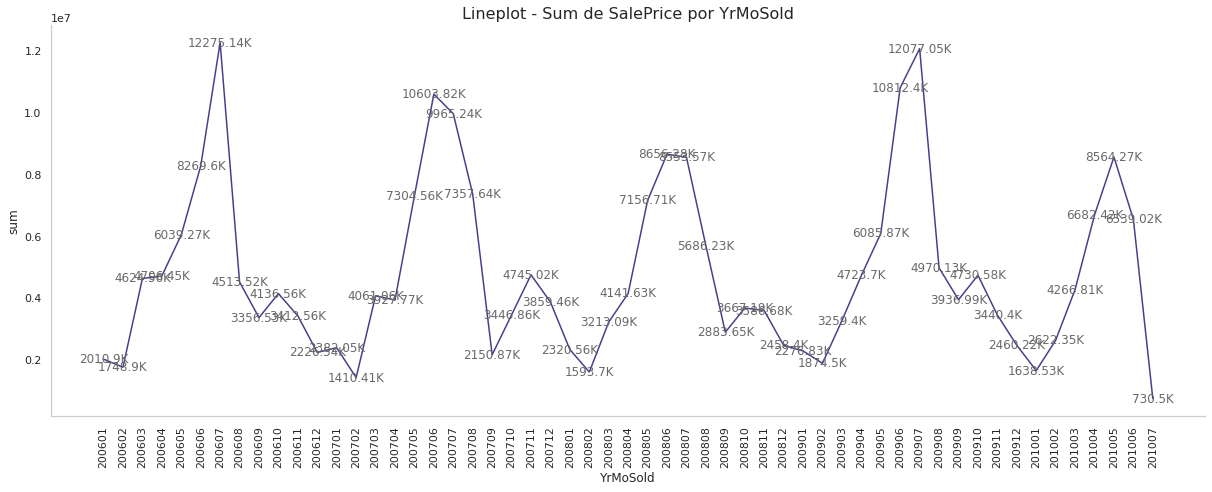

In [16]:
df['YrMoSold'] = (df['YrSold'] * 100 + df['MoSold'])
plot_evolutionplot(df=df, x='YrMoSold', y='SalePrice', agg_type='sum', date_col=False)

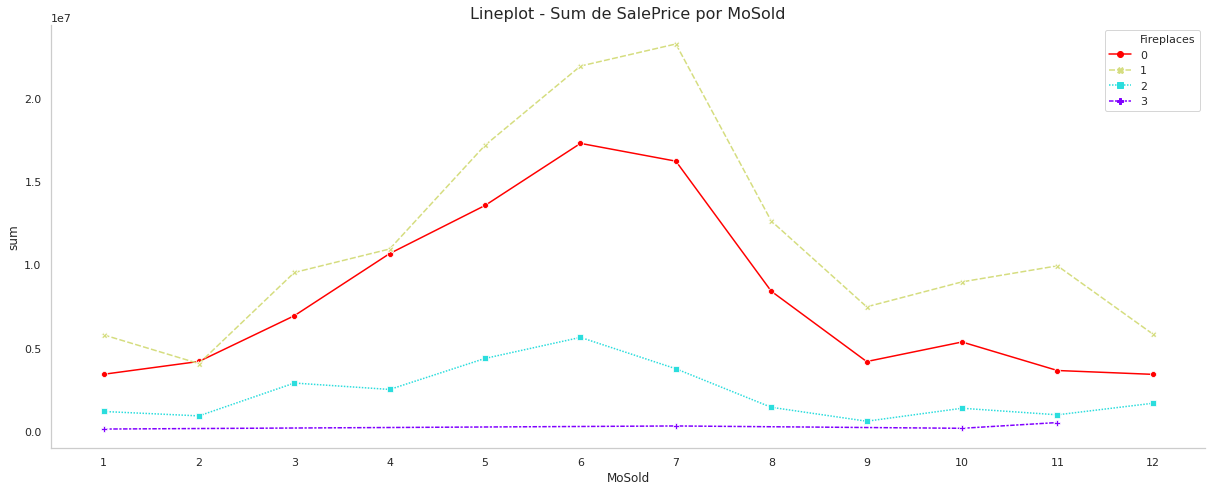

In [17]:
df['YrMoSold'] = (df['YrSold'] * 100 + df['MoSold'])
plot_evolutionplot(df=df, x='MoSold', y='SalePrice', hue='Fireplaces', agg_type='sum', 
                   date_col=False, x_rot=0, label_data=False, style='Fireplaces')

In [18]:
df.YrSold.dtype

dtype('int64')

NameError: name 'df_group' is not defined

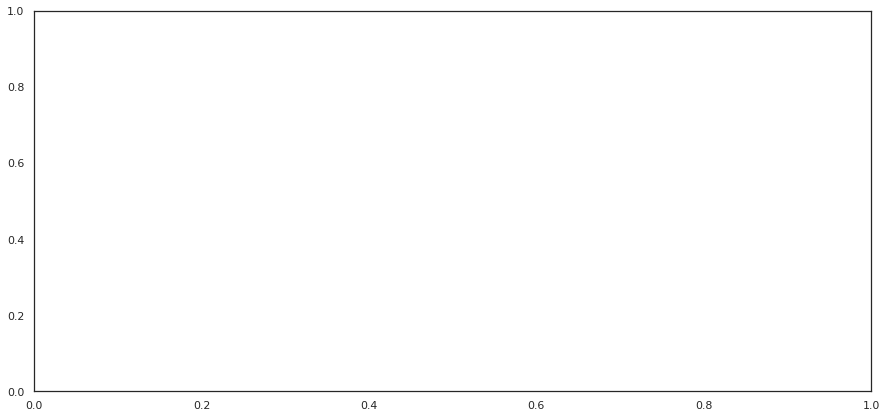

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(x='YrMoSold', y='count', data=df_group.query('SaleCondition == "Normal"'), hue='SaleCondition')

In [ ]:
df_group.query('SaleCondition == "Family"').head(20)

In [ ]:
cat

In [ ]:
len(cat)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
df_group['YrMoSold'] = df_group['YrMoSold'].astype(str)
sns.lineplot(data=df_group, x='teste', y='count', hue='SaleCondition', sort=True)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)


In [ ]:
from datetime import datetime
string = '202001'
datetime.strptime(string, '%Y%m')

In [ ]:
from datetime import datetime
df_group['teste'] = df_group['YrMoSold'].apply(lambda x: datetime.strptime(x, '%Y%m'))

In [ ]:
df_group.head()

In [ ]:
date_time_obj

In [ ]:
data = {'Time of Day': ['Day', 'Day', 'Day', 'Evening', 'Evening', 'Evening', 'Morning', 'Morning', 'Morning', 'Night', 'Night', 'Night'],
        'Season': ['Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter'],
        'value': [30.581606, 25.865560000000002, 42.644529999999996, 39.954759, 32.053458, 53.678297, 32.171245, 25.070815, 42.876667, 22.082042, 17.510289999999998, 33.262356]}

# create dataframe
df = pd.DataFrame(data)

"""# set categorical order
df['Time of Day'] = pd.Categorical(df['Time of Day'],
                                   categories=['Morning', 'Day', 'Evening', 'Night'],
                                   ordered=True)"""

# plot
g = sns.lineplot(x='Time of Day', y='value', data=df, hue='Season')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

In [ ]:
cat = np.sort(np.unique(df_group['YrMoSold'].values))
cat

In [ ]:
df_group['YrMoSold'] = pd.Categorical(df_group['YrMoSold'], categories=cat, ordered=True)

In [ ]:
df_group.head()

In [ ]:
data = {'Time of Day': ['Day', 'Day', 'Day', 'Evening', 'Evening', 'Evening', 'Morning', 'Morning', 'Morning', 'Night', 'Night', 'Night'],
        'Season': ['Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter'],
        'value': [30.581606, 25.865560000000002, 42.644529999999996, 39.954759, 32.053458, 53.678297, 32.171245, 25.070815, 42.876667, 22.082042, 17.510289999999998, 33.262356]}

# create dataframe
df = pd.DataFrame(data)

df

In [ ]:
sns.__version__

In [ ]:
fig, ax = plt.subplots(figsize=(17, 6))
sns.barplot(x='YrMoSold', y='count', data=df_group.query('YrMoSold in ("200601", "200602", "200603", "200604")'), hue='SaleCondition')
for tick in ax.get_xticklabels():
        tick.set_rotation(90)

In [ ]:
fig, ax = plt.subplots(figsize=(17, 6))
sns.lineplot(x='YrMoSold', y='count', data=df_group.query('YrMoSold in ("200601", "200602", "200603", "200604")'), hue='SaleCondition')
for tick in ax.get_xticklabels():
        tick.set_rotation(90)

In [ ]:
# Construindo coluna de anomes
df['YrMoSold'] = df['YrSold'] * 100 + df['MoSold']
df['YrMoSold'] = df['YrMoSold'].astype(str)
plot_aggreg_lineplot(df=df, x='YrMoSold', y='SalePrice', hue='GarageCars', agg=True, agg_type='count',
                     xtick_rotation=90)

In [ ]:
df_group = make_aggregation(df=df, group_col='YrMoSold', value_col='SalePrice')
df_group.columns = ['YrMoSold', 'count', 'sum', 'mean']
df_group = df_group.iloc[:, :2]
df_group.columns = ['YrMoSold', 'SalePrice']
df_group.head()